In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Salary')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [8]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

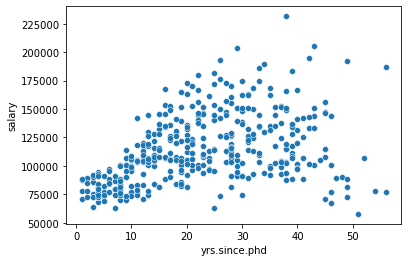

In [9]:
sns.scatterplot(x='yrs.since.phd', y='salary', data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

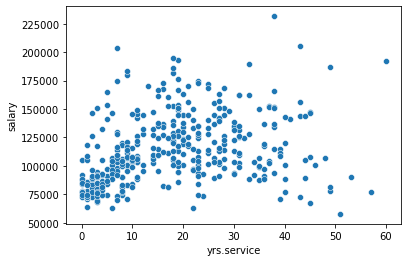

In [10]:
sns.scatterplot(x='yrs.service', y='salary', data=df)

In [11]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

In [12]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
list1 = ['rank','discipline','sex']

for i in list1:
    df[i] = le.fit_transform(df[i].values.reshape(-1,1))
    
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [13]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
a = df.drop(['salary'], axis=1)
a

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [17]:
b = df['salary']
b

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
# mean=0 and std=1
sc = StandardScaler()
a=sc.fit_transform(a)
a

array([[ 0.64925739,  0.91540317, -0.25754973,  0.02966908,  0.3300584 ],
       [ 0.64925739,  0.91540317, -0.17985426, -0.12429986,  0.3300584 ],
       [-0.67256406,  0.91540317, -1.42298184, -1.12509795,  0.3300584 ],
       ...,
       [ 0.64925739, -1.09241483,  1.52944617,  0.56856036,  0.3300584 ],
       [ 0.64925739, -1.09241483,  0.20862311, -0.20128433,  0.3300584 ],
       [-0.67256406, -1.09241483, -1.11219995, -1.04811348,  0.3300584 ]])

rank                AxesSubplot(0.125,0.657941;0.110714x0.222059)
discipline       AxesSubplot(0.257857,0.657941;0.110714x0.222059)
yrs.since.phd    AxesSubplot(0.390714,0.657941;0.110714x0.222059)
yrs.service      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
sex              AxesSubplot(0.656429,0.657941;0.110714x0.222059)
salary           AxesSubplot(0.789286,0.657941;0.110714x0.222059)
dtype: object

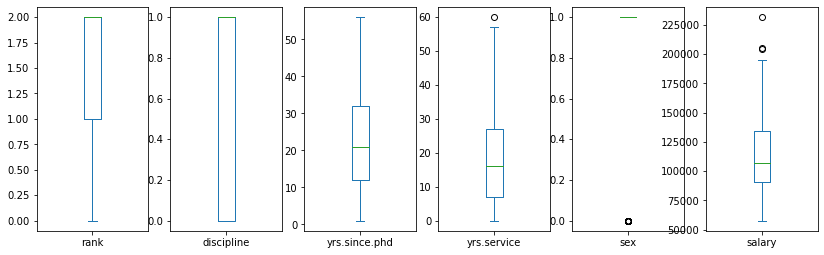

In [19]:
df.plot(kind='box', subplots=True, layout=(3,6), figsize=(14,14))

In [24]:
maxscore=0
maxRS=0

import numpy as np
for i in range(0,1000):
    a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2, random_state=i)
    lm = LinearRegression()
    lm.fit(a_train,b_train)
    predlm = lm.predict(a_test)
    lmscore = round(lm.score(a_train,b_train),4)
    
    if lmscore>maxscore:
        maxscore=lmscore
        maxRS=i

print('At random state', i,'lm score is: ', round(lm.score(a_train,b_train),4))
print('Mean Squared error is: ', mean_squared_error(b_test,predlm))
print('Root Mean Squared error is: ', np.sqrt(mean_squared_error(b_test,predlm)), '\n')

At random state 999 lm score is:  0.3677
Mean Squared error is:  605569213.7228369
Root Mean Squared error is:  24608.315946501436 



In [25]:
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range(1, 1000):
    a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(a_train, b_train)
    pred = lr.predict(a_test)
    r2 = r2_score(b_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)   

Best R2 score is 0.5352462039914034 on Random State 972


In [26]:
i = 999
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2, random_state=i)
lm = LinearRegression()
lm.fit(a_train,b_train)
predlm = lm.predict(a_test)
print('At random state', i,'lm score is: ', round(lm.score(a_train,b_train),4))
print('Mean Squared error is: ', mean_squared_error(b_test,predlm)*100)
print('Root Mean Squared error is: ', np.sqrt(mean_squared_error(b_test,predlm))*100, '\n')

At random state 999 lm score is:  0.3677
Mean Squared error is:  60556921372.28368
Root Mean Squared error is:  2460831.5946501438 



In [27]:
h = np.array(b_test)
predicted = np.array(lm.predict(a_test))
df_com = pd.DataFrame({'Original': h, 'Predicted':predicted}, index = range(len(h)))
df_com

,Original,Predicted
0,128800,116452.396618
1,95611,95372.555919
2,122875,117634.670955
3,86250,95693.592410
4,88650,72411.718446
...,...,...
75,97032,102307.429906
76,136660,117574.255510
77,127100,116992.597973
78,126621,131862.299078
